In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

terrorism=pd.read_csv('/kaggle/input/gtdcleandata/gtdcleandata.csv', encoding='ISO-8859-1')
terrorism.head()

,Eventid,Year,Country,Region,Crit1,Crit2,Crit3,Success,Attacktype,Targtype,Natlty1,Gname,Weaptype,Nkill,Nwound,Damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,1,1,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,1,1,1,1,Hostage Taking,Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,1,1,1,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,1,1,1,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,1,1,1,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN,NaN


In [10]:
terrorism.rename(columns={'Damage':'Demage'}, inplace=True)
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Eventid     181691 non-null  int64  
 1   Year        181691 non-null  int64  
 2   Country     181691 non-null  object 
 3   Region      181691 non-null  object 
 4   Crit1       181691 non-null  int64  
 5   Crit2       181691 non-null  int64  
 6   Crit3       181691 non-null  int64  
 7   Success     181691 non-null  int64  
 8   Attacktype  181691 non-null  object 
 9   Targtype    181691 non-null  object 
 10  Natlty1     180132 non-null  object 
 11  Gname       181691 non-null  object 
 12  Weaptype    181691 non-null  object 
 13  Nkill       171378 non-null  float64
 14  Nwound      165380 non-null  float64
 15  Demage      164817 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 22.2+ MB


In [15]:
terrorism.tail()

,Eventid,Year,Country,Region,Crit1,Crit2,Crit3,Success,Attacktype,Targtype,Natlty1,Gname,Weaptype,Nkill,Nwound,Demage
181686,201712310022,2017,Somalia,Sub-Saharan Africa,1,1,0,1,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0,3.0
181687,201712310029,2017,Syria,Middle East & North Africa,1,1,0,1,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0,9.0
181688,201712310030,2017,Philippines,Southeast Asia,1,1,1,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0,0.0
181689,201712310031,2017,India,South Asia,1,1,1,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0,0.0
181690,201712310032,2017,Philippines,Southeast Asia,1,1,1,0,Bombing/Explosion,Unknown,Philippines,Unknown,Explosives,0.0,0.0,0.0


In [11]:
print('Country with highest terrorists attacks: ', terrorism['Country'].value_counts())

Country with highest terrorists attacks:  Country
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Andorra                    1
North Korea                1
Falkland Islands           1
Wallis and Futuna          1
Antigua and Barbuda        1
Name: count, Length: 204, dtype: int64


In [12]:
print('Countrys with highest terrorists attacks: ', terrorism['Country'].value_counts().index[0])

Countrys with highest terrorists attacks:  Iraq


In [13]:
print('Regions with highest terrorists attacks: ', terrorism['Region'].value_counts().index[0])

Regions with highest terrorists attacks:  Middle East & North Africa


In [14]:
print('Maximum number of people were killed in a single attack: ', terrorism['Nkill'].max())

Maximum number of people were killed in a single attack:  1570.0


In [15]:
print('Region where Maximum number of people were killed in a single attack: ', terrorism['Region'].unique()[0])

Region where Maximum number of people were killed in a single attack:  Central America & Caribbean


In [16]:
terrorism['Demage']=terrorism['Nkill']+terrorism['Nwound']
terrorism['Demage']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Demage, Length: 181691, dtype: float64

In [18]:
terrorism['Country']=terrorism['Country'].replace('South Veitnam','Veitnam', regex=True)

In [19]:
terrorism['Weaptype']=terrorism['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)

In [21]:
terrorism['Attacktype']=terrorism['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

In [24]:
atk_filter=terrorism['Attacktype'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack'] else 'Others')
attacktype=atk_filter.value_counts().tolist()
attacktype

[88255, 42669, 19312, 12149, 10356, 8950]

In [25]:
labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']

In [28]:
sizes=[]
for i in attacktype:
    percent=(i*100)/len(terrorism['Attacktype'])
    sizes.append(percent)

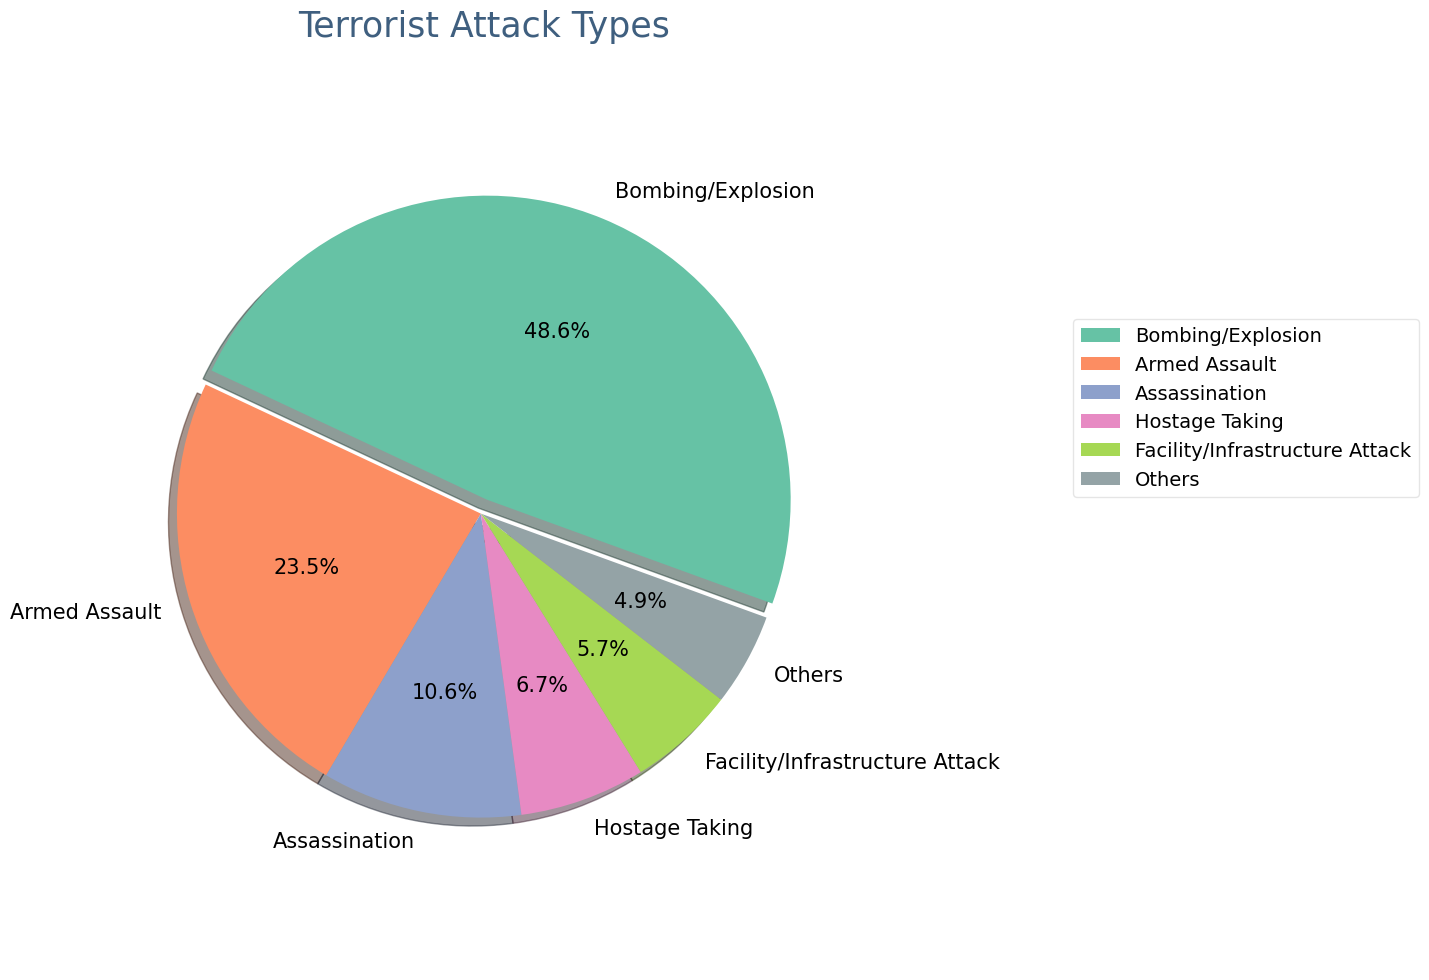

In [29]:
fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=-20,
                              shadow=True,explode=(0.05,0,0,0,0,0),
                              colors=sns.color_palette('Set2',8)[:5]+
                              [(0.58,0.64,0.65)],
                              textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist Attack Types',fontsize=25,pad=-70,
         color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
         prop={'size':14})
fig.show()

In [30]:
cat=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat=sns.color_palette('Set2',8)[:5]
color_cat_dict=dict(zip(cat,color_cat))
table1=terrorism[['Attacktype','Demage']].groupby('Attacktype',as_index=False).sum().sort_values(by='Demage',ascending=False)
table1=table1.reset_index()
table1=table1.reset_index()
inci=[88255, 42669, 19312, 12149, 10356, 8950, 4569, 12346]
table1['Incidents']=np.array(inci)
table1['Demage Rate']=table1['Demage']/table1['Incidents']
table1

,level_0,index,Attacktype,Demage,Incidents,Demage Rate
0,0,2,Bombing/Explosion,514233.0,88255,5.826673
1,1,0,Armed Assault,212386.0,42669,4.977525
2,2,7,Unknown,39606.0,19312,2.050849
3,3,1,Assassination,37209.0,12149,3.062721
4,4,5,Hostage Taking,27732.0,10356,2.677868
5,5,4,Hijacking,20642.0,8950,2.306369
6,6,6,Unarmed Assault,14791.0,4569,3.237251
7,7,3,Facility/Infrastructure Attack,6293.0,12346,0.509720


In [31]:
labels=table1['Attacktype'].tolist()
labels

['Bombing/Explosion',
 'Armed Assault',
 'Unknown',
 'Assassination',
 'Hostage Taking',
 'Hijacking',
 'Unarmed Assault',
 'Facility/Infrastructure Attack']

In [43]:
x=np.array(len(labels))
dmg=table1['Demage'].tolist()
dmg

[514233.0, 212386.0, 39606.0, 37209.0, 27732.0, 20642.0, 14791.0, 6293.0]

In [42]:
gray=(0.5,0.64,0.65)
color_list=[color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray
           for ter_type in labels]
color_list

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5, 0.64, 0.65),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [41]:
d_rate=table1['Demage Rate'].tolist()

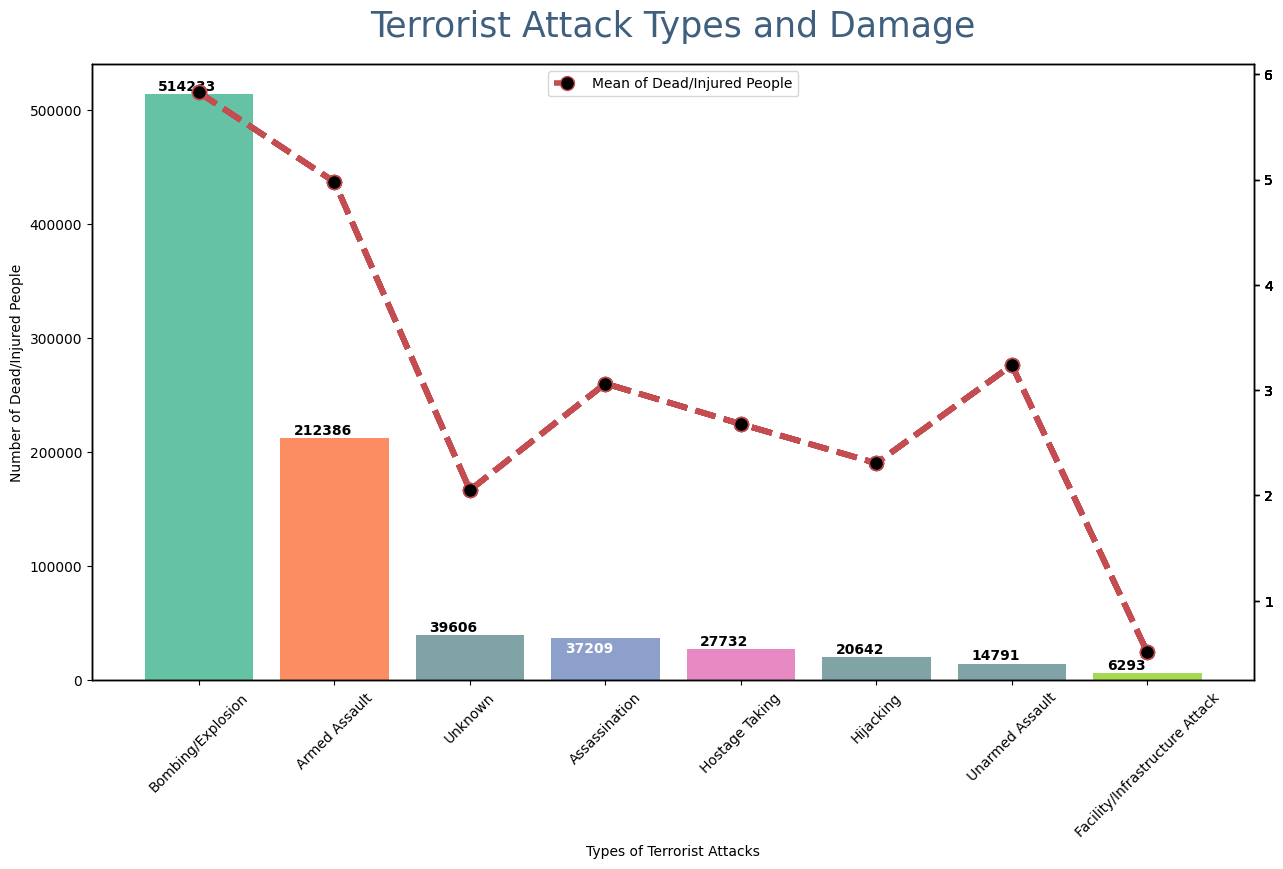

In [46]:
fig, ax1=plt.subplots(figsize=(15,8))
ax1.bar(labels,dmg,color=color_list,align='center')
for i,v in enumerate(dmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000,str(round(v)),color='w'
            if v==37209 else 'k', fontweight='bold')
    ax2=ax1.twinx()
    ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
            label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Terrorist Attack Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Terrorist Attacks',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [47]:
table2=terrorism[['Weaptype','Demage']].groupby('Weaptype',as_index=False).sum().sort_values(by='Demage',ascending=False)
df_count=terrorism['Weaptype'].value_counts()
df_count=df_count.reindex(table2['Weaptype'].values)
df_count

Weaptype
Explosives            92426
Firearms              58524
Unknown               15157
Vehicle                 136
Melee                  3655
Chemical                321
Incendiary            11135
Biological               35
Sabotage Equipment      141
Other                   114
Radiological             14
Fake Weapons             33
Name: count, dtype: int64

In [49]:
table2['WeapCount']=df_count.values
table2['WeapCount']

2     92426
4     58524
10    15157
11      136
6      3655
1       321
5     11135
0        35
9       141
7       114
8        14
3        33
Name: WeapCount, dtype: int64

In [51]:
table2['Weap_demage_rate']=table2['Demage']/table2['WeapCount']
table2

,Weaptype,Demage,WeapCount,Weap_demage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


In [52]:
weaplabels=table2['Weaptype'].tolist()
weaplabels

['Explosives',
 'Firearms',
 'Unknown',
 'Vehicle',
 'Melee',
 'Chemical',
 'Incendiary',
 'Biological',
 'Sabotage Equipment',
 'Other',
 'Radiological',
 'Fake Weapons']

In [54]:
y=np.arange(len(weaplabels))
weapdmg=table2['Demage'].tolist()
weapdmg

[537788.0,
 225473.0,
 50167.0,
 20297.0,
 14489.0,
 14377.0,
 8898.0,
 814.0,
 357.0,
 225.0,
 6.0,
 1.0]

In [56]:
wgray=(0.5,0.64,0.65)
w_cat=['Explosives','Firearms','Unknown','Incendiary']
wcolorcat=sns.color_palette('Set2',8)[:4:1]
wcolor_cat_dict=dict(zip(w_cat,wcolorcat))
wcolor_list=[wcolor_cat_dict[ter_type] if
            ter_type in wcolor_cat_dict.keys() else wgray for ter_type in weaplabels]
w_rate=table2['Weap_demage_rate'].tolist()

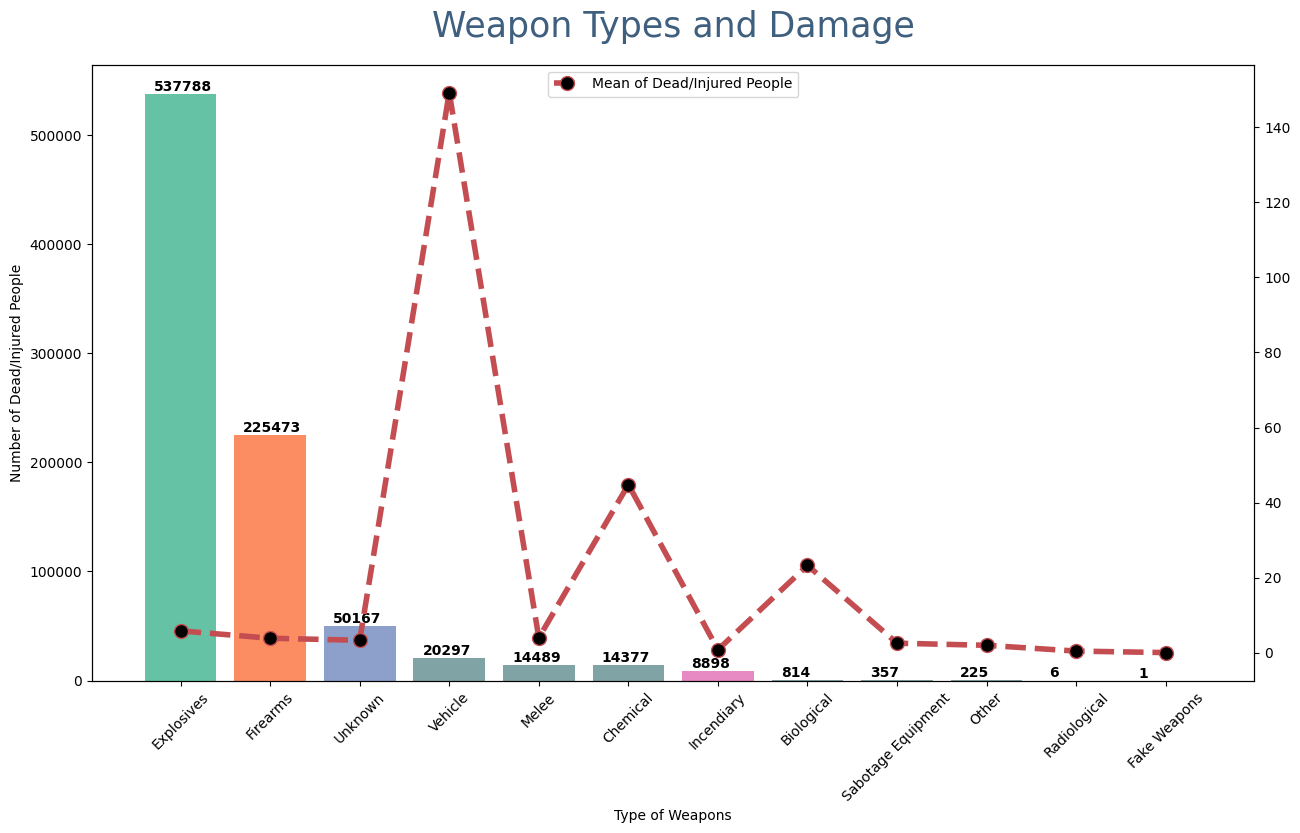

In [57]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(weaplabels,weapdmg,color=wcolor_list,align='center')
#Number in bar chart
for i,v in enumerate(weapdmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(weaplabels,w_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Weapon Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Type of Weapons',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(weaplabels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [59]:
country_damage=terrorism[terrorism['Year']>1999][['Country','Demage']].groupby('Country',as_index=False).sum()
country_damage

,Country,Demage
0,Afghanistan,78988.0
1,Albania,3.0
2,Algeria,6724.0
3,Angola,1773.0
4,Argentina,5.0
...,...,...
162,Western Sahara,3.0
163,Yemen,16122.0
164,Yugoslavia,30.0
165,Zambia,2.0


In [60]:
data_paint=country_damage.sort_values(by='Demage',ascending=False).head(10)
data_paint

,Country,Demage
69,Iraq,201126.0
0,Afghanistan,78988.0
110,Pakistan,54873.0
65,India,27251.0
156,United States,21520.0
108,Nigeria,20874.0
142,Syria,20754.0
163,Yemen,16122.0
131,Somalia,15930.0
115,Philippines,11896.0


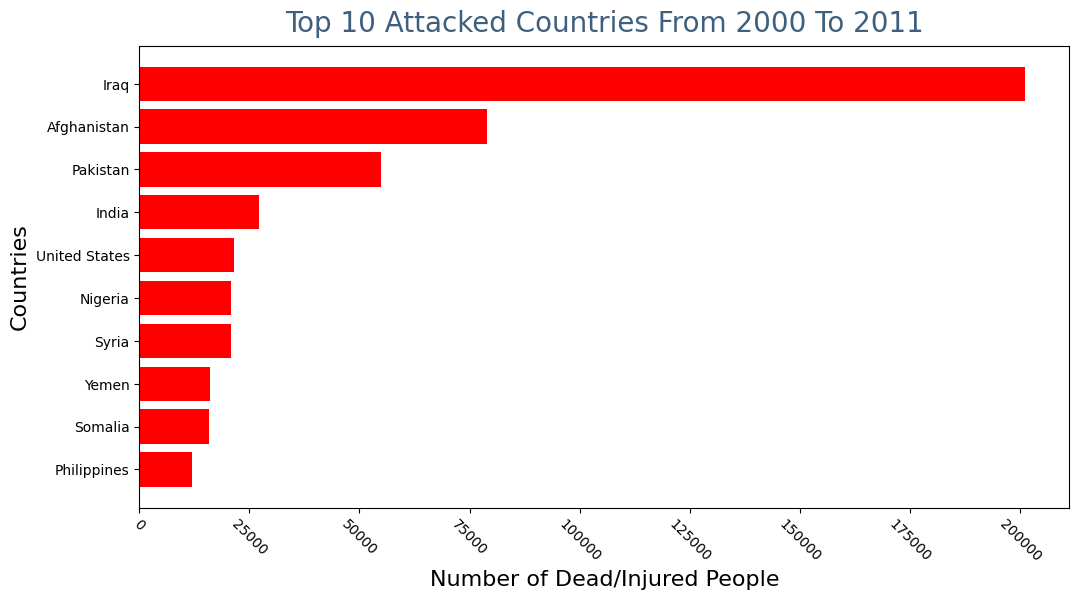

In [61]:
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint['Country'][::-1],data_paint['Demage'][::-1],color='red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Attacked Countries From 2000 To 2011',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [65]:
nalty_dmg=terrorism[terrorism['Year']>1999][['Natlty1','Demage']].groupby('Natlty1',as_index=False).sum()
terrorism['Natlty1']

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
181686               Somalia
181687                Russia
181688           Philippines
181689                 India
181690           Philippines
Name: Natlty1, Length: 181691, dtype: object

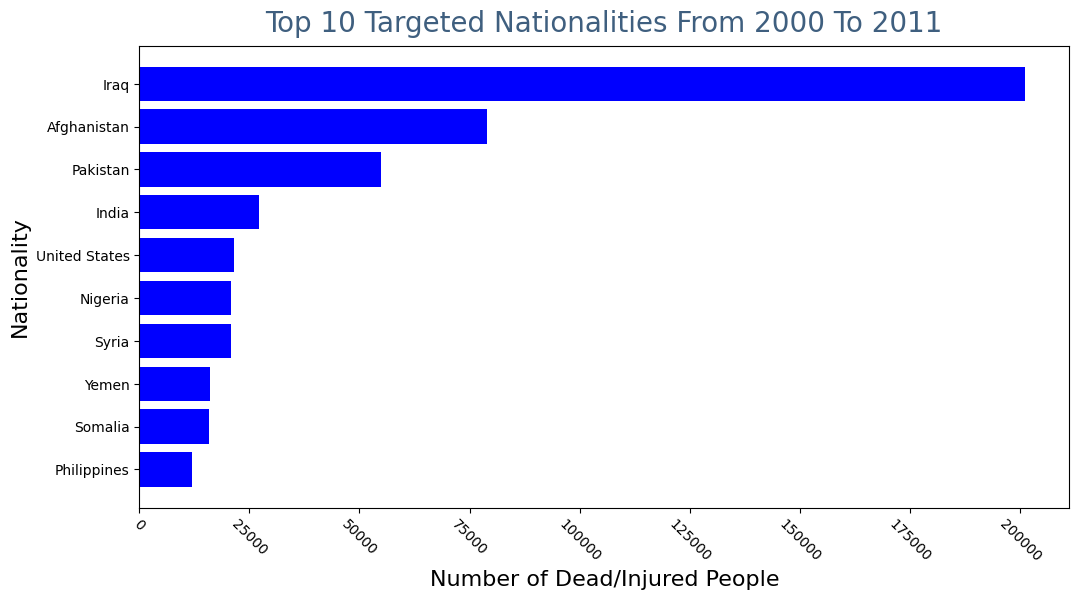

In [66]:
data_paint_natly=nalty_dmg.sort_values(by='Demage',ascending=False).head(10)
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint_natly['Natlty1'][::-1],data_paint['Demage'][::-1],color='blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Targeted Nationalities From 2000 To 2011',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [68]:
country_damage[country_damage['Demage']==0]

,Country,Demage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


In [69]:
len(country_damage[country_damage['Demage']==0])

10

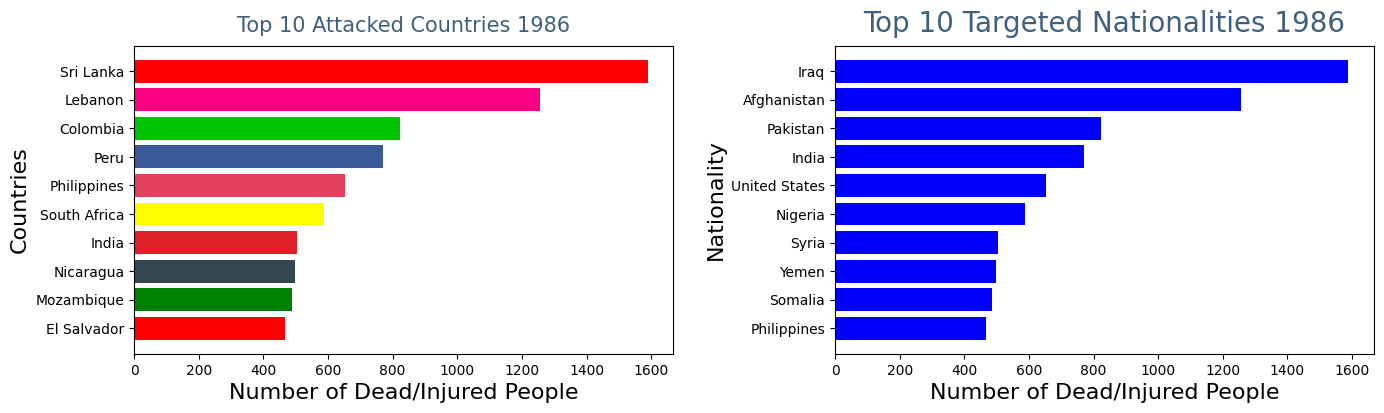

In [ ]:
def country_nationality(n):
    ''' Function to draw the bar charts of top 10 
    Attacked Countries and Top 10 Targeted Nationalities'''
  
    top10_bad=terrorism[terrorism['Year']==n][['Country','Demage']].groupby('Country',as_index=False).sum()
    data_paint=top10_bad.sort_values(by='Demage',ascending=False).head(10)
    fig,ax=plt.subplots(1,2,figsize=(16,4))
    ax[0].barh(data_paint['Country'][::-1],data_paint['Demage'][::-1],
               color=['red','green','#344650','#df2029','#FFFC00',
                     '#E4405F','#3B5999','#00c300','#ff0084'])
    ax[0].set_ylabel('Countries',size=16)
    ax[0].set_xlabel('Number of Dead/Injured People',size=16)
    ax[0].set_title('Top 10 Attacked Countries %d' %n,fontsize=15,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
    
    plt.subplots_adjust(wspace=0.3)

    nalty_dmg=terrorism[terrorism['Year']>1999][['Natlty1','Demage']].groupby('Natlty1',as_index=False).sum()
    data_paint_natly=nalty_dmg.sort_values(by='Demage',ascending=False).head(10)
    ax[1].barh(data_paint_natly['Natlty1'][::-1],data_paint['Demage'][::-1],color='blue')
    ax[1].set_ylabel('Nationality',size=16)
    ax[1].set_xlabel('Number of Dead/Injured People',size=16)
    ax[1].set_title('Top 10 Targeted Nationalities %d' %n,fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
    plt.show()
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

list_year=[]
for year in range(1970,1993): list_year.append(year)
for year in range(1994,2012): list_year.append(year)
for year in list_year:
    country_nationality(year)
    time.sleep(2)
    clear_output()
    